This notebook will introduce several libraries and basic syntax that we will utilize in the course. The following code block import libraries that we will be using for the demonstration.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

The following code block shows how we can access functions from an imported module. In particular, we are calling the `listdir` function from the `os` module. This function shows the files that are in the directory specified in the function arguments. When no arguments are provided, the function looks in the current directory.

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'sample_data.csv',
 'sample_data_large.csv',
 'SPT_Example.ipynb']

The type of the object is a `list`.

In [3]:
type(os.listdir())

list

We can save the list as an object that can be referenced later.

In [4]:
file_list = os.listdir()

We can access elements of the list by appending a valid index value in square brackets. **Note that Python, like most programming languages, starts indexing at 0, i.e., the $0^{th}$ element is the first element in the list.**

In [5]:
file_list[0]

'.ipynb_checkpoints'

A `for` loop allows us to iterate over objects

In [6]:
for file in file_list:
    print(file)

.ipynb_checkpoints
sample_data.csv
sample_data_large.csv
SPT_Example.ipynb


Suppose we wanted to get the index of the file in the underlying list and the file's name. In another programming language like `C`, you would probably do something like:

In [7]:
# C-style
index = 0
for file in file_list:
    print('File',index,'is', file)
    index += 1

File 0 is .ipynb_checkpoints
File 1 is sample_data.csv
File 2 is sample_data_large.csv
File 3 is SPT_Example.ipynb


In Python, we can use `enumerate` to return a tuple that contains the index and the object. Thus, the loop can be rewritten as:

In [8]:
for index, file in enumerate(os.listdir()):
    print(f'File {index} is {file}')

File 0 is .ipynb_checkpoints
File 1 is sample_data.csv
File 2 is sample_data_large.csv
File 3 is SPT_Example.ipynb


In contrast to many other languages, working with data stored in Excel files is oftentimes very simple due to the functionality included in the `Pandas` library.

In [9]:
pd.read_csv('sample_data.csv')

,Job,pj,rj
0,1,8.0,24.0
1,2,9.0,16.0
2,3,8.0,17.0
3,4,8.0,28.0
4,5,7.0,2.0
5,6,8.0,3.0
6,7,7.0,1.0
7,8,9.0,25.0
8,9,10.0,23.0
9,10,7.0,26.0


As we saw with lists, we can store the `DataFrame` object returned by `Pandas` in a variable. The `head` function (or method) allows us to print the first five rows.

In [10]:
data = pd.read_csv('sample_data.csv')
data.head()

,Job,pj,rj
0,1,8.0,24.0
1,2,9.0,16.0
2,3,8.0,17.0
3,4,8.0,28.0
4,5,7.0,2.0


The `shape` attribute allows us to inspect the dimensions of the data object.

In [11]:
data.shape

(10, 3)

The following code block shows how we can access a column of the `data` object.

In [12]:
data['pj']

0     8.0
1     9.0
2     8.0
3     8.0
4     7.0
5     8.0
6     7.0
7     9.0
8    10.0
9     7.0
Name: pj, dtype: float64

When we access a single column, we are actually getting a `Series` object. Essentially, a `DataFrame` is just a collection of `Series` objects that share an index.

In [13]:
type(data['pj'])

pandas.core.series.Series

We can use the `values` attribute to get an array from a `Series` or `DataFrame` object.

In [14]:
data['pj'].values

array([ 8.,  9.,  8.,  8.,  7.,  8.,  7.,  9., 10.,  7.])

Using the `type` function reveals that the array is actually a `numpy.ndarray`

In [15]:
type(data['pj'].values)

numpy.ndarray

Instead, we could have returned the values as a list using the `to_list` function.

In [18]:
data['pj'].tolist()

[8.0, 9.0, 8.0, 8.0, 7.0, 8.0, 7.0, 9.0, 10.0, 7.0]

`Pandas` makes generating quick plots very simple.

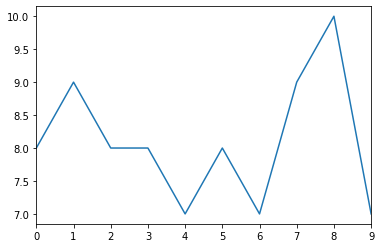

In [19]:
data['pj'].plot()
plt.show()

You can specify a valid value for the `kind` argument to change the plot type.

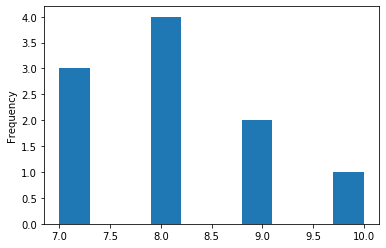

In [20]:
data['pj'].plot(kind = 'hist')
plt.show()

The `loc` method allows us to access *slices* of a `Pandas` object by index values.

In [21]:
data.loc[0,:]

Job     1.0
pj      8.0
rj     24.0
Name: 0, dtype: float64

If we want to use one of our data columns as the index, we can use the `set_index` method.

In [22]:
data.set_index('Job')

,pj,rj
Job,,
1,8.0,24.0
2,9.0,16.0
3,8.0,17.0
4,8.0,28.0
5,7.0,2.0
6,8.0,3.0
7,7.0,1.0
8,9.0,25.0
9,10.0,23.0


**Be careful, we did not actually change the `data` object!**

In [23]:
data.head()

,Job,pj,rj
0,1,8.0,24.0
1,2,9.0,16.0
2,3,8.0,17.0
3,4,8.0,28.0
4,5,7.0,2.0


To change the object, we need to overwrite the original object as shown in the next code block.

In [24]:
data = data.set_index('Job')
data.head()

,pj,rj
Job,,
1,8.0,24.0
2,9.0,16.0
3,8.0,17.0
4,8.0,28.0
5,7.0,2.0


Trying to access items that are not in the index will result in an error.

In [25]:
try:
    data.loc[0,:]
except Exception as ex:
    print(f'{type(ex).__name__} {ex.args}')

KeyError (0,)


We can get the index values of a `Pandas` object using the `index` method.

In [27]:
data.index.tolist()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Shortest Processing Time - Approach 1

We will now demonstrate how we can use Python to write a simple algorithm that applies the shortest processing time (SPT) rule to a single machine scheduling instance with release dates.

The following code block simply uses the index of the `data` object to create a list of unscheduled jobs.

In [28]:
unscheduled = data.index.tolist()
unscheduled

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Before attempting to write an algorithm, we need to note a few things. First, note that we can pass this list to the `loc` method.

In [29]:
data.loc[unscheduled,:]

,pj,rj
Job,,
1,8.0,24.0
2,9.0,16.0
3,8.0,17.0
4,8.0,28.0
5,7.0,2.0
6,8.0,3.0
7,7.0,1.0
8,9.0,25.0
9,10.0,23.0


The ability to pass a list to the `loc` method allows us to limit the data based on a subset of index values.

In [30]:
data.loc[[1,3,5],:]

,pj,rj
Job,,
1,8.0,24.0
3,8.0,17.0
5,7.0,2.0


Second, the `iterrows` method allows us to iterate over a `DataFrame`, returning each row and corresponding index value, in a similar fashion as we saw with `enumerate`.

In [31]:
for index, row in data.iterrows():
    print(index, row['pj'])

1 8.0
2 9.0
3 8.0
4 8.0
5 7.0
6 8.0
7 7.0
8 9.0
9 10.0
10 7.0


Third, an empty object actually evaluates to `False` if used in a conditional statement.

In [32]:
my_list = []

if my_list:
    print(True)
else:
    print(False)

False


In [33]:
my_list = [1]

if my_list:
    print(True)
else:
    print(False)

True


The reserved keyword `None` also evaluates to `False`.

In [34]:
my_var = None

if my_var:
    print(True)
else:
    print(False)

False


Finally, `Numpy` includes a constant `inf` that represents positive infinity.

In [35]:
np.inf

inf

Using these pieces of information, we can write the SPT algorithm as follows, where the `append` and `remove` methods are used to add and remove elements from a `list` object, respectively. Comments in the code describe the steps.

In [36]:
# Create a list named unscheduled_jobs and initialize it
# to contain all of the available jobs
unscheduled_jobs = data.index.tolist()

# Set a variable that tracks the current time to 0
current_t = 0.0

# Create an empty list that will store the schedule
schedule = []

# While the list of unscheduled job includes at least one job
while unscheduled_jobs:
    
    # Set a variable tracking the minimum processing time 
    # encountered to infinity
    min_pj = np.inf
    
    # Set a variable tracking the job associated with the minimum 
    # processing time encountered to None
    min_job = None
    
    # Iterate over the data for the unscheduled jobs
    for index, row in data.loc[unscheduled_jobs, :].iterrows():
        
        # If the current job is released
        if row['rj'] <= current_t:
            
            # If the processing time of the current job is 
            # less than the minimum processing time encountered
            if row['pj'] < min_pj:
                
                # Update the minimum processing time
                min_pj = row['pj']
                
                # Store the associated release date
                min_rj = row['rj']
                
                # Store the job
                min_job = index
    
    # If a candidate job was selected
    if min_job:
        
        # Compute the completion time of the job
        finish_time = current_t + min_pj
        
        # Append job info to the schedule
        schedule.append([min_job, 
                         min_pj, 
                         min_rj, 
                         current_t, 
                         finish_time])
        
        # Remove the job from the list of unscheduled jobs
        unscheduled_jobs.remove(min_job)
        
        # Update the current time variable to equal the finish
        # time of the newly scheduled job
        current_t = finish_time
    
    # If no candidate job was selected, we must need to wait
    # until one of the unscheduled jobs is released
    else:
        
        # Increment the current time by 1 and try again
        current_t += 1

# Convert the schedule to a Pandas DataFrame for viewing
pd.DataFrame(schedule, columns = ['Job', 'pj', 'rj', 'Start', 'End'])

,Job,pj,rj,Start,End
0,7,7.0,1.0,1.0,8.0
1,5,7.0,2.0,8.0,15.0
2,6,8.0,3.0,15.0,23.0
3,3,8.0,17.0,23.0,31.0
4,10,7.0,26.0,31.0,38.0
5,1,8.0,24.0,38.0,46.0
6,4,8.0,28.0,46.0,54.0
7,2,9.0,16.0,54.0,63.0
8,8,9.0,25.0,63.0,72.0
9,9,10.0,23.0,72.0,82.0


After testing that the function works, we can use it to construct a function. You use functions in programming to bundle a set of instructions that you want to use repeatedly or that, because of their complexity, are better self-contained in a sub-program and called when needed.

In [37]:
def Apply_SPT_1_rj(dataframe):
    '''
    This function computes the SPT schedule for a single machine instance with
    release dates. The function takes a Pandas DataFrame as an argument. The index
    of the DataFrame should by the job number/name. The DataFrame should include columns
    1) 'pj', which specifies the processing time for each job, and
    2) 'rj', which specifies the release date for each job.
    
    The function returns a Pandas DataFrame with the schedule
    -------------------------------------------------------------------------------------
    '''

    unscheduled_jobs = dataframe.index.tolist()
    current_t = 0.0
    schedule = []

    while unscheduled_jobs:
        min_pj = np.inf
        min_job = None
        for index, row in dataframe.loc[unscheduled_jobs, :].iterrows():
            if row['rj'] <= current_t:
                if row['pj'] < min_pj:
                    min_pj = row['pj']
                    min_rj = row['rj']
                    min_job = index
        if min_job:
            finish_time = current_t + min_pj
            schedule.append([min_job, 
                             min_pj, 
                             min_rj, 
                             current_t, 
                             finish_time])
            unscheduled_jobs.remove(min_job)
            current_t = finish_time
        else:
            current_t += 1

    return pd.DataFrame(schedule, columns = ['Job', 'pj', 'rj', 'Start', 'End'])

The following code block calls the function.

In [38]:
Apply_SPT_1_rj(data)

,Job,pj,rj,Start,End
0,7,7.0,1.0,1.0,8.0
1,5,7.0,2.0,8.0,15.0
2,6,8.0,3.0,15.0,23.0
3,3,8.0,17.0,23.0,31.0
4,10,7.0,26.0,31.0,38.0
5,1,8.0,24.0,38.0,46.0
6,4,8.0,28.0,46.0,54.0
7,2,9.0,16.0,54.0,63.0
8,8,9.0,25.0,63.0,72.0
9,9,10.0,23.0,72.0,82.0


We can test the execution time of the function using the *Magic* `timeit` command (this is only available in Jupyter).

In [39]:
%%timeit
temp = Apply_SPT_1_rj(data)

8.92 ms ± 481 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


As the output shows, the function runs very quickly on our 10-job instance. Let's see how it does for a larger, 1000-job instance. The following code block reads the larger instance and saves it as an object named `data_large`.

In [40]:
data_large = pd.read_csv('sample_data_large.csv')
data_large = data_large.set_index('Job')
data_large.shape

(1000, 2)

Inspecting the first five rows shows that the format of the data for the large instance is the same as we saw before.

In [41]:
data_large.head()

,pj,rj
Job,,
1,10.0,7.0
2,9.0,19.0
3,7.0,19.0
4,9.0,28.0
5,6.0,23.0


The following code block times our scheduling function on the larger dataset.

In [42]:
%%timeit
temp = Apply_SPT_1_rj(data_large)

26.9 s ± 657 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


As expected, it takes much longer to run the algorithm on the larger dataset. Can we do better?

# Shortest Processing Time - Approach 2

We will now look at a second approach for constructing the algorithm that leans more heavily on the `Numpy` library. `Pandas` is actually built *on top* of `Numpy`. In other words, `Pandas` depends on `Numpy`. This dependency allows `Pandas` to incorporate fact array computations. For example, we can find the minimum value in a column of a `Pandas` `DataFrame` using the `min` method.

In [43]:
data['pj'].min()

7.0

We can also very easily find the index of the minimum value.

In [44]:
data['pj'].idxmin()

5

The `dir` function allows us to see (*almost*) all available methods.

In [45]:
dir(data['pj'])

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__p

Note that we can use conditional statements to create a series of *boolean* values that indicate rows of DataFrame where a condition is satisfied.

In [46]:
data['pj'] == data['pj'].min()

Job
1     False
2     False
3     False
4     False
5      True
6     False
7      True
8     False
9     False
10     True
Name: pj, dtype: bool

We can use this boolean series to limit the data shown.

In [47]:
data[data['pj'] == data['pj'].min()]

,pj,rj
Job,,
5,7.0,2.0
7,7.0,1.0
10,7.0,26.0


The following code block implements the SPT algorithm using the previously noted techniques.

In [48]:
# Create a list named unscheduled_jobs and initialize it
# to contain all of the available jobs
unscheduled_jobs = data.index.tolist()

# Set a variable that tracks the current time to 0
current_t = 0.0

# Create an empty list that will store the schedule
schedule = []

# While the list of unscheduled job includes at least one job
while unscheduled_jobs:
    
    # Create a boolean series that indicates rows corresponding to 
    # unscheduled jobs that are available to schedule, i.e., released
    mask = (data['rj'] <= current_t) & (data.index.isin(unscheduled_jobs))
    
    # If at least one unscheduled job is available
    if mask.sum() > 0:
        
        # Find the index that corresponds to the first
        # job with the minium processing time
        min_index = data.loc[mask,'pj'].idxmin()
        
        # Compute the completion time of the job
        finish_time = current_t + data.loc[min_index,'pj']
        
        # Append job info to the schedule
        schedule.append([min_index, 
                         data.loc[min_index,'pj'], 
                         data.loc[min_index,'rj'], 
                         current_t, 
                         finish_time])
        
        # Remove the job from the list of unscheduled jobs
        unscheduled_jobs.remove(min_index)
        
        # Update the current time variable to equal the finish
        # time of the newly scheduled job
        current_t = finish_time
    
    # If no unscheduled job is available
    else:
        
        # Find the minimum release date for unscheduled jobs and use
        # this value to update the current time variable
        current_t = data.loc[unscheduled_jobs,'rj'].min()

# Convert the schedule to a Pandas DataFrame for viewing
pd.DataFrame(schedule, columns = ['Job', 'pj', 'rj', 'Start', 'End'])

,Job,pj,rj,Start,End
0,7,7.0,1.0,1.0,8.0
1,5,7.0,2.0,8.0,15.0
2,6,8.0,3.0,15.0,23.0
3,3,8.0,17.0,23.0,31.0
4,10,7.0,26.0,31.0,38.0
5,1,8.0,24.0,38.0,46.0
6,4,8.0,28.0,46.0,54.0
7,2,9.0,16.0,54.0,63.0
8,8,9.0,25.0,63.0,72.0
9,9,10.0,23.0,72.0,82.0


In [49]:
def Apply_SPT_1_rj_Vector(dataframe):
    '''
    This function computes the SPT schedule for a single machine instance with
    release dates. The function takes a Pandas DataFrame as an argument. The index
    of the DataFrame should by the job number/name. The DataFrame should include columns
    1) 'pj', which specifies the processing time for each job, and
    2) 'rj', which specifies the release date for each job.
    
    The function returns a Pandas DataFrame with the schedule
    -------------------------------------------------------------------------------------
    '''

    unscheduled_jobs = dataframe.index.tolist()
    current_t = 0.0
    schedule = []

    while unscheduled_jobs:
        mask = (dataframe['rj'] <= current_t) & (dataframe.index.isin(unscheduled_jobs))
        if mask.sum() > 0:
            min_index = dataframe.loc[mask,'pj'].idxmin()
            finish_time = current_t + dataframe.loc[min_index,'pj']
            schedule.append([min_index, 
                             dataframe.loc[min_index,'pj'], 
                             dataframe.loc[min_index,'rj'], 
                             current_t, 
                             finish_time])
            unscheduled_jobs.remove(min_index)
            current_t = finish_time
        else:
            current_t = dataframe.loc[unscheduled_jobs,'rj'].min()

    return pd.DataFrame(schedule, columns = ['Job', 'pj', 'rj', 'Start', 'End'])

The following code block calls the function.

In [50]:
Apply_SPT_1_rj_Vector(data)

,Job,pj,rj,Start,End
0,7,7.0,1.0,1.0,8.0
1,5,7.0,2.0,8.0,15.0
2,6,8.0,3.0,15.0,23.0
3,3,8.0,17.0,23.0,31.0
4,10,7.0,26.0,31.0,38.0
5,1,8.0,24.0,38.0,46.0
6,4,8.0,28.0,46.0,54.0
7,2,9.0,16.0,54.0,63.0
8,8,9.0,25.0,63.0,72.0
9,9,10.0,23.0,72.0,82.0


Timing the revised function on the 10-job instance show little, if any, improvement.

In [51]:
%%timeit
temp = Apply_SPT_1_rj_Vector(data)

10.6 ms ± 357 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


However, the performance for the larger dataset is much improved.

In [52]:
%%timeit
temp = Apply_SPT_1_rj_Vector(data_large)

1.04 s ± 49.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
